In [1]:
from directed_graphs.datasets import directed_circle, directed_cylinder, directed_spiral, directed_swiss_roll, directed_spiral_uniform, directed_swiss_roll_uniform
from directed_graphs.datasets import plot_directed_2d, plot_directed_3d
from directed_graphs.diffusion_flow_embedding import DiffusionFlowEmbedder
import torch
import numpy as np

In [2]:
if torch.__version__[:4] == "1.13":
	# device = torch.device('cuda' if torch.cuda.is_available() else 'mps' if torch.has_mps else 'cpu')
	device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

else:
	device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

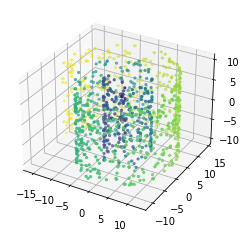

In [3]:
X, flow, labels = directed_swiss_roll_uniform(num_nodes=1000, num_spirals=2.5, radius=1, height=20, xtilt=0, ytilt=0)
plot_directed_3d(X, flow, labels, mask_prob=0.5)

In [4]:
X = torch.tensor(X)
flow = torch.tensor(flow)
X = X.float().to(device)
flow = flow.float().to(device)

  0%|          | 0/2000 [00:00<?, ?it/s]

EPOCH 0. Loss 1450.9156494140625. Flow strength 4.999000072479248. Weight of flow 0.5 Heatmap of P embedding is 


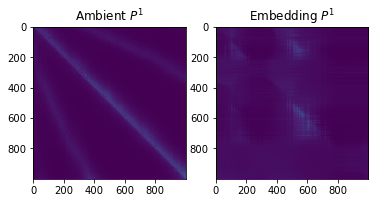

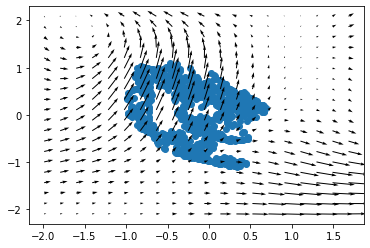

  5%|▌         | 100/2000 [00:30<09:17,  3.41it/s]

EPOCH 100. Loss 1838.3935546875. Flow strength 4.937063217163086. Weight of flow 0.5 Heatmap of P embedding is 


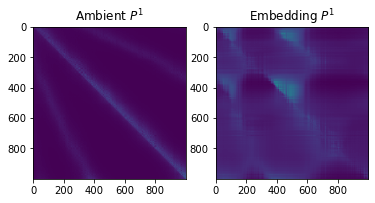

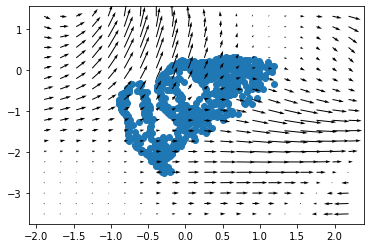

 10%|█         | 200/2000 [00:55<06:41,  4.48it/s]

EPOCH 200. Loss 452.94805908203125. Flow strength 4.917881965637207. Weight of flow 0.5 Heatmap of P embedding is 


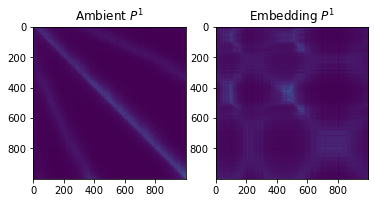

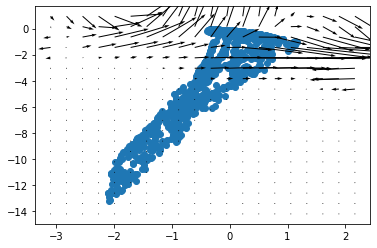

 15%|█▌        | 300/2000 [01:18<06:17,  4.51it/s]

EPOCH 300. Loss 35.4312744140625. Flow strength 4.897221088409424. Weight of flow 0.5 Heatmap of P embedding is 


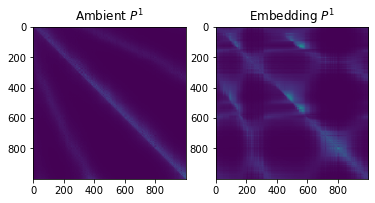

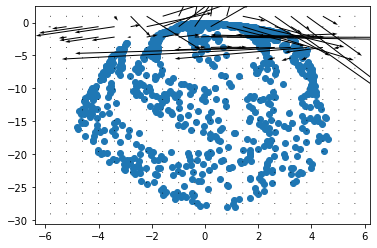

 20%|██        | 400/2000 [01:42<05:56,  4.49it/s]

EPOCH 400. Loss 12.34261703491211. Flow strength 4.875749588012695. Weight of flow 0.5 Heatmap of P embedding is 


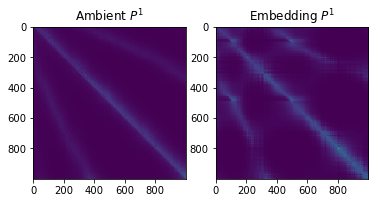

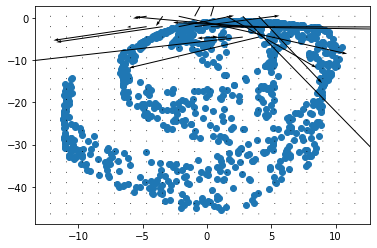

 25%|██▌       | 500/2000 [02:05<05:34,  4.49it/s]

EPOCH 500. Loss 8.347378730773926. Flow strength 4.861460208892822. Weight of flow 0.5 Heatmap of P embedding is 


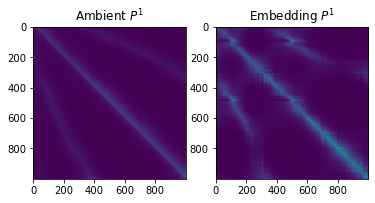

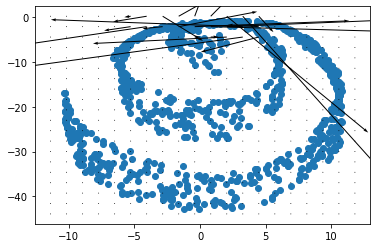

 30%|███       | 600/2000 [02:29<05:09,  4.52it/s]

EPOCH 600. Loss -0.7507753372192383. Flow strength 4.843987464904785. Weight of flow 0.5 Heatmap of P embedding is 


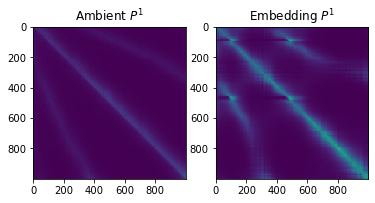

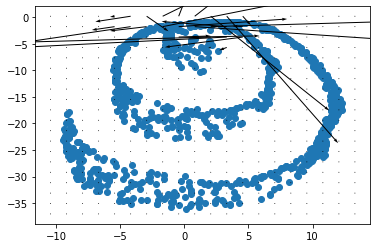

 35%|███▌      | 700/2000 [02:55<06:20,  3.41it/s]

EPOCH 700. Loss -0.3254380226135254. Flow strength 4.823906421661377. Weight of flow 0.5 Heatmap of P embedding is 


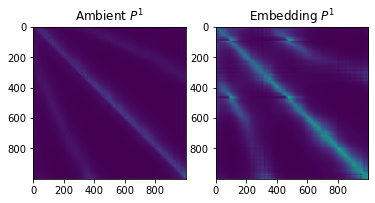

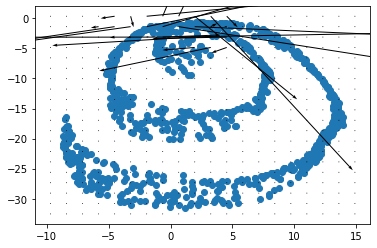

 40%|████      | 800/2000 [03:20<04:25,  4.52it/s]

EPOCH 800. Loss 2.6325457096099854. Flow strength 4.8075642585754395. Weight of flow 0.5 Heatmap of P embedding is 


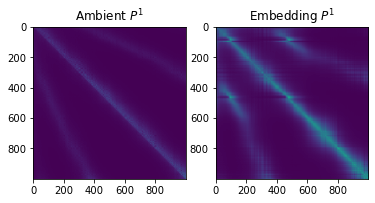

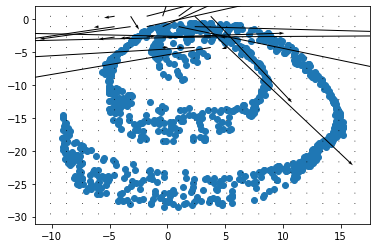

 45%|████▌     | 900/2000 [03:44<04:06,  4.47it/s]

EPOCH 900. Loss 1.7728157043457031. Flow strength 4.785553455352783. Weight of flow 0.5 Heatmap of P embedding is 


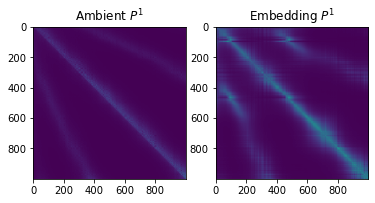

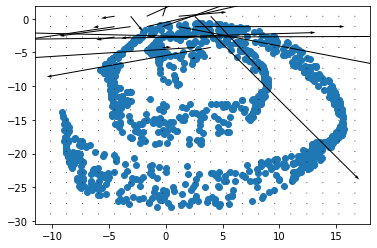

 50%|█████     | 1000/2000 [04:07<03:44,  4.45it/s]

EPOCH 1000. Loss 1.8203563690185547. Flow strength 4.75385856628418. Weight of flow 0.5 Heatmap of P embedding is 


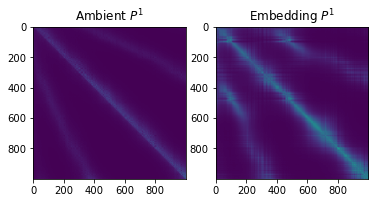

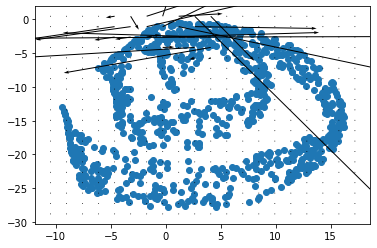

 55%|█████▌    | 1100/2000 [04:32<04:23,  3.41it/s]

EPOCH 1100. Loss 0.15930986404418945. Flow strength 4.719078063964844. Weight of flow 0.5 Heatmap of P embedding is 


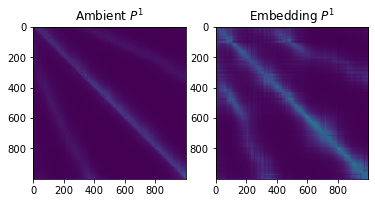

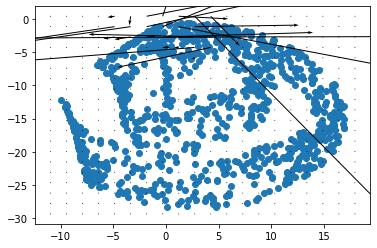

 60%|██████    | 1200/2000 [05:00<02:57,  4.51it/s]

EPOCH 1200. Loss -0.749056339263916. Flow strength 4.671835899353027. Weight of flow 0.5 Heatmap of P embedding is 


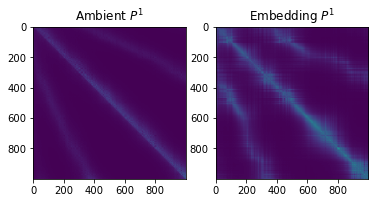

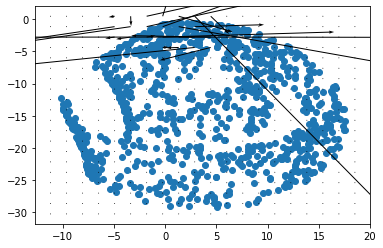

 65%|██████▌   | 1300/2000 [05:29<03:25,  3.41it/s]

EPOCH 1300. Loss 0.5551466941833496. Flow strength 4.615596771240234. Weight of flow 0.5 Heatmap of P embedding is 


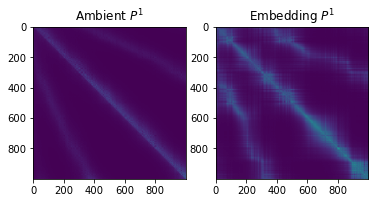

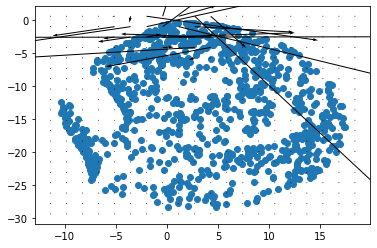

 70%|███████   | 1400/2000 [05:54<02:13,  4.49it/s]

EPOCH 1400. Loss 0.5920677185058594. Flow strength 4.564528465270996. Weight of flow 0.5 Heatmap of P embedding is 


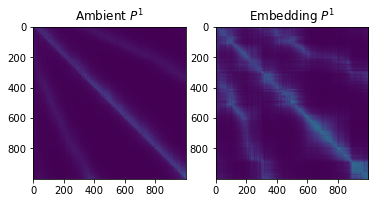

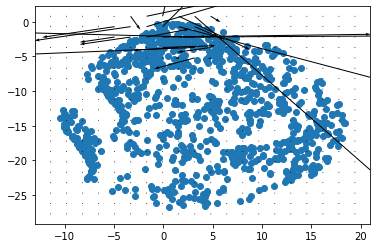

 75%|███████▌  | 1500/2000 [06:18<01:51,  4.50it/s]

EPOCH 1500. Loss 5.697395324707031. Flow strength 4.495549201965332. Weight of flow 0.5 Heatmap of P embedding is 


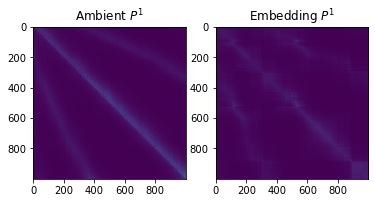

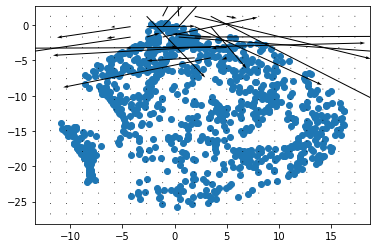

 80%|████████  | 1600/2000 [06:42<01:28,  4.50it/s]

EPOCH 1600. Loss 2.416745185852051. Flow strength 4.422905921936035. Weight of flow 0.5 Heatmap of P embedding is 


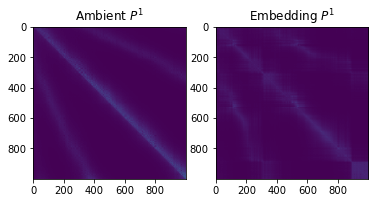

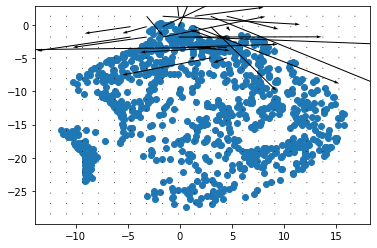

 85%|████████▌ | 1700/2000 [07:09<01:27,  3.41it/s]

EPOCH 1700. Loss 3.153214931488037. Flow strength 4.349822998046875. Weight of flow 0.5 Heatmap of P embedding is 


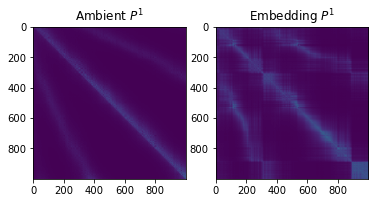

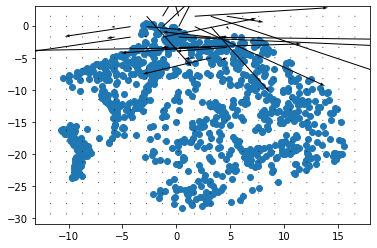

 90%|█████████ | 1800/2000 [07:40<00:58,  3.40it/s]

EPOCH 1800. Loss 3.8875269889831543. Flow strength 4.288753509521484. Weight of flow 0.5 Heatmap of P embedding is 


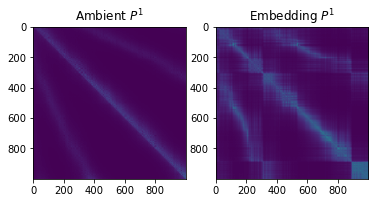

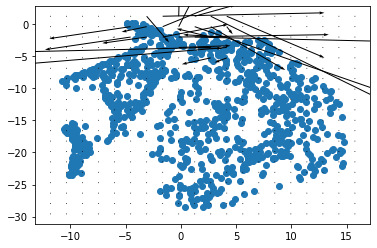

 95%|█████████▌| 1900/2000 [08:10<00:29,  3.41it/s]

EPOCH 1900. Loss 3.8878660202026367. Flow strength 4.22802209854126. Weight of flow 0.5 Heatmap of P embedding is 


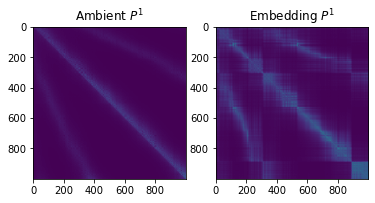

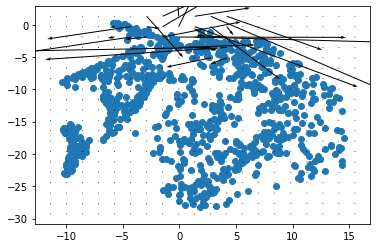

100%|██████████| 2000/2000 [08:39<00:00,  3.85it/s]


Exiting training with loss  tensor(5.1083, device='cuda:0', grad_fn=<AddBackward0>)


In [7]:
dfe = DiffusionFlowEmbedder(X,flow,t=1,sigma_graph=5,sigma_embedding=5,device=device, learning_rate = 1e-3)
dfe = dfe.to(device)
embeddings = dfe.fit(n_steps=2000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


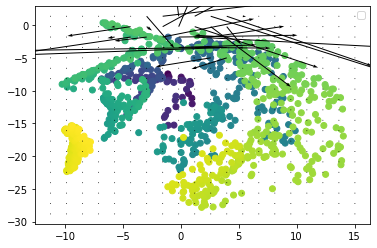

In [8]:
dfe.visualize_points(labels)

  0%|          | 0/2000 [00:00<?, ?it/s]

EPOCH 0. Loss 0.7735907435417175. Flow strength 4.999000072479248. Weight of flow 1 Heatmap of P embedding is 


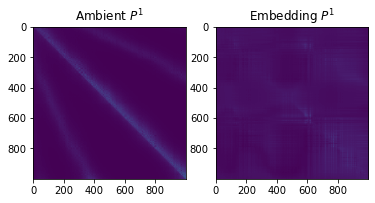

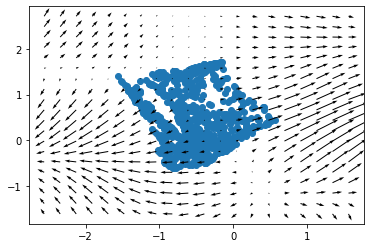

  5%|▌         | 100/2000 [00:26<07:08,  4.44it/s]

EPOCH 100. Loss 0.7301082015037537. Flow strength 4.908123970031738. Weight of flow 1 Heatmap of P embedding is 


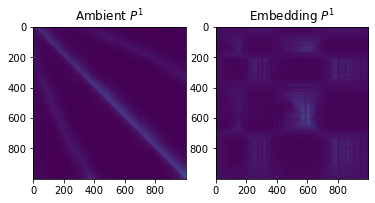

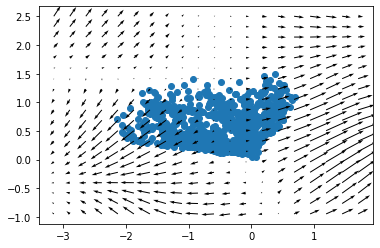

 10%|█         | 200/2000 [00:49<06:46,  4.43it/s]

EPOCH 200. Loss 0.7031649947166443. Flow strength 4.836468696594238. Weight of flow 1 Heatmap of P embedding is 


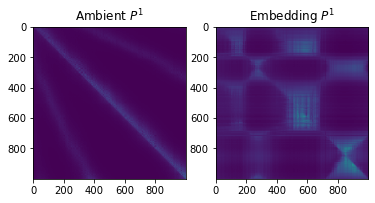

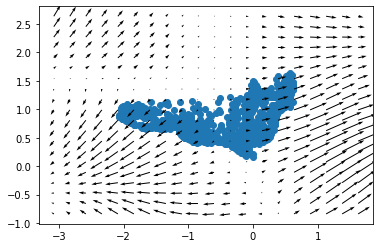

 15%|█▌        | 300/2000 [01:13<06:20,  4.47it/s]

EPOCH 300. Loss 0.7496340274810791. Flow strength 4.802023410797119. Weight of flow 1 Heatmap of P embedding is 


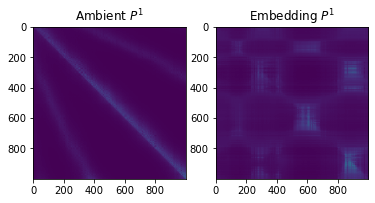

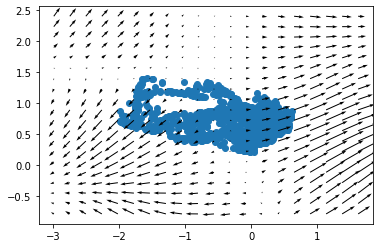

 20%|██        | 400/2000 [01:40<07:56,  3.35it/s]

EPOCH 400. Loss 0.7198862433433533. Flow strength 4.740354061126709. Weight of flow 1 Heatmap of P embedding is 


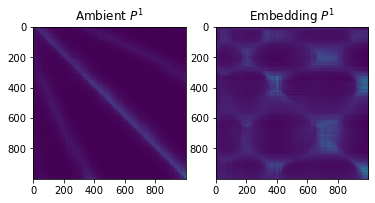

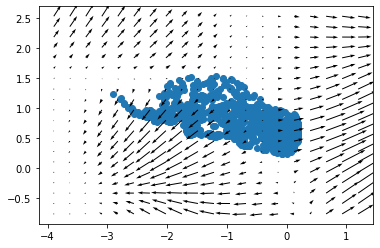

 25%|██▌       | 500/2000 [02:11<07:25,  3.37it/s]

EPOCH 500. Loss 0.6321343183517456. Flow strength 4.8584771156311035. Weight of flow 1 Heatmap of P embedding is 


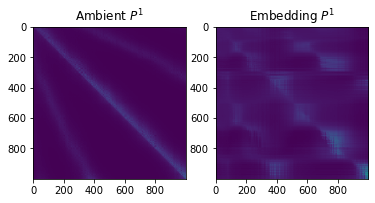

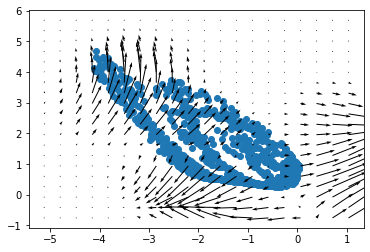

 30%|███       | 600/2000 [02:37<05:13,  4.46it/s]

EPOCH 600. Loss 0.6395624279975891. Flow strength 4.955665588378906. Weight of flow 1 Heatmap of P embedding is 


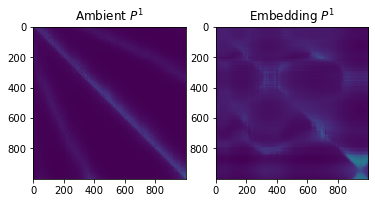

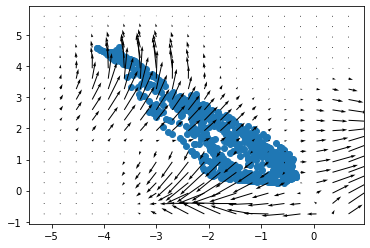

 35%|███▌      | 700/2000 [03:01<04:54,  4.42it/s]

EPOCH 700. Loss 0.6584041118621826. Flow strength 4.963932991027832. Weight of flow 1 Heatmap of P embedding is 


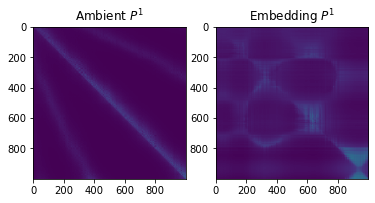

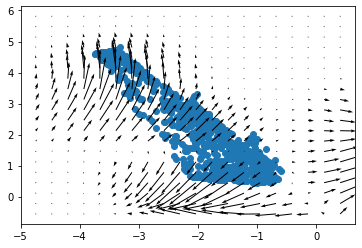

 40%|████      | 800/2000 [03:25<04:29,  4.46it/s]

EPOCH 800. Loss 0.690463662147522. Flow strength 4.952167987823486. Weight of flow 1 Heatmap of P embedding is 


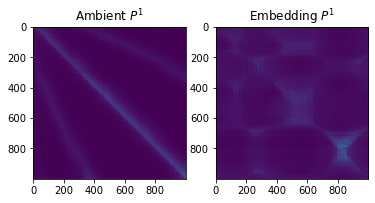

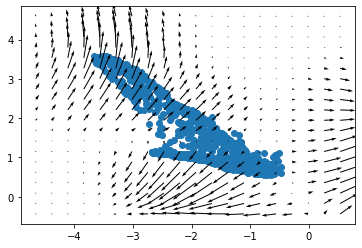

 45%|████▌     | 900/2000 [03:48<04:14,  4.31it/s]

EPOCH 900. Loss 0.697661280632019. Flow strength 5.0122551918029785. Weight of flow 1 Heatmap of P embedding is 


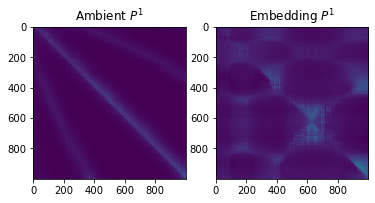

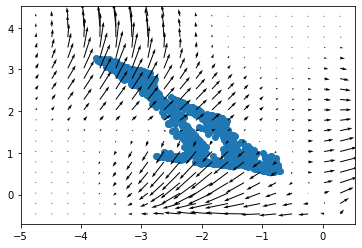

 50%|█████     | 1000/2000 [04:12<03:43,  4.48it/s]

EPOCH 1000. Loss 0.6644861102104187. Flow strength 4.899844646453857. Weight of flow 1 Heatmap of P embedding is 


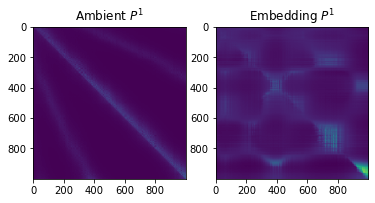

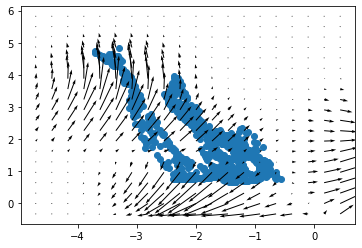

 55%|█████▌    | 1100/2000 [04:36<03:21,  4.47it/s]

EPOCH 1100. Loss 0.6746009588241577. Flow strength 4.959043025970459. Weight of flow 1 Heatmap of P embedding is 


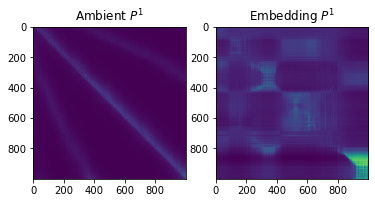

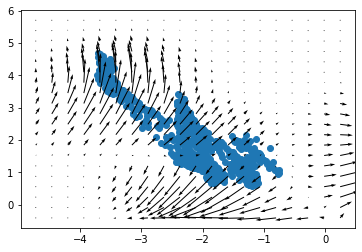

 60%|██████    | 1200/2000 [05:00<02:59,  4.47it/s]

EPOCH 1200. Loss 0.7039652466773987. Flow strength 4.906436920166016. Weight of flow 1 Heatmap of P embedding is 


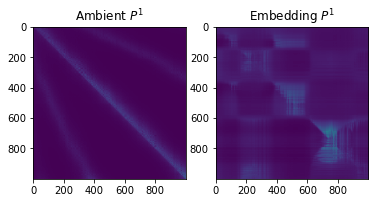

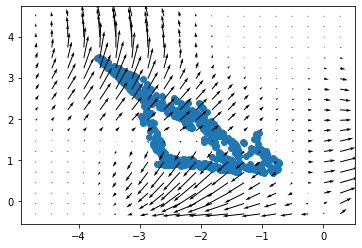

 65%|██████▌   | 1300/2000 [05:23<02:36,  4.48it/s]

EPOCH 1300. Loss 0.7418500185012817. Flow strength 4.879170894622803. Weight of flow 1 Heatmap of P embedding is 


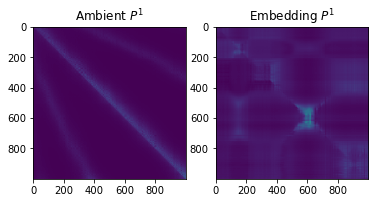

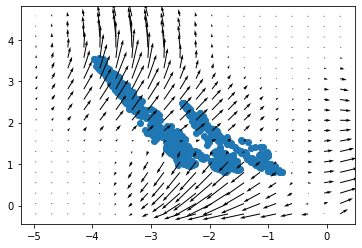

 70%|███████   | 1400/2000 [05:48<02:15,  4.42it/s]

EPOCH 1400. Loss 0.7125900983810425. Flow strength 4.840127944946289. Weight of flow 1 Heatmap of P embedding is 


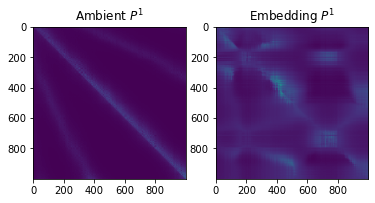

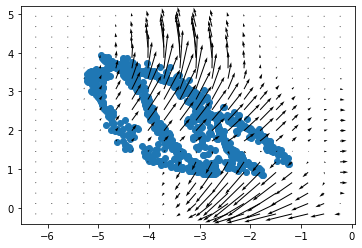

 75%|███████▌  | 1500/2000 [06:12<01:52,  4.44it/s]

EPOCH 1500. Loss 0.6996027231216431. Flow strength 4.840446472167969. Weight of flow 1 Heatmap of P embedding is 


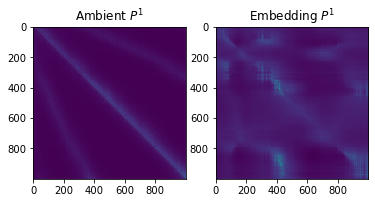

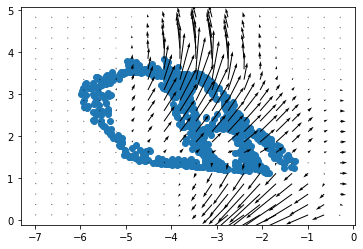

 80%|████████  | 1600/2000 [06:38<01:37,  4.09it/s]

EPOCH 1600. Loss 0.6573364734649658. Flow strength 4.842692852020264. Weight of flow 1 Heatmap of P embedding is 


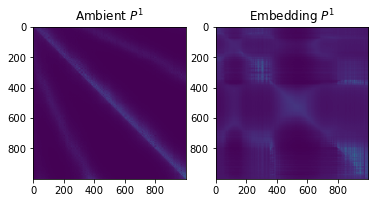

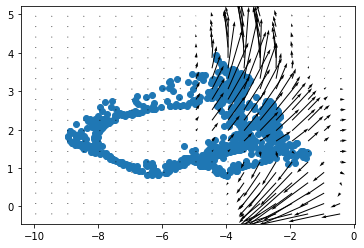

 85%|████████▌ | 1700/2000 [07:03<01:28,  3.38it/s]

EPOCH 1700. Loss 0.6391164660453796. Flow strength 4.839215278625488. Weight of flow 1 Heatmap of P embedding is 


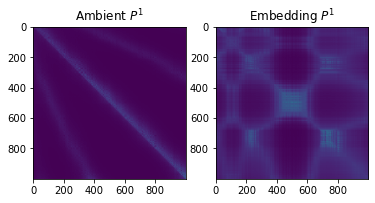

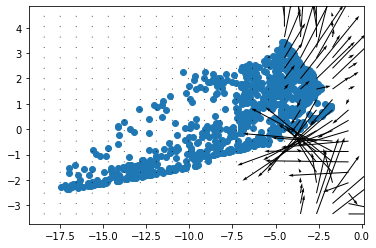

 90%|█████████ | 1800/2000 [07:28<00:44,  4.47it/s]

EPOCH 1800. Loss 0.5090253353118896. Flow strength 4.84824275970459. Weight of flow 1 Heatmap of P embedding is 


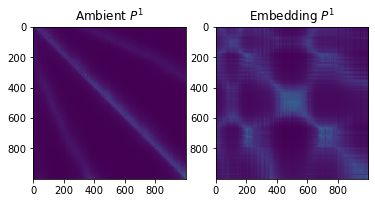

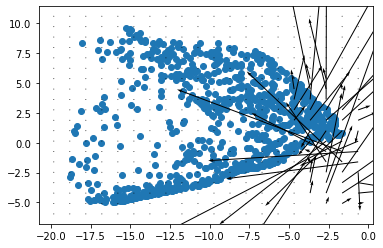

 95%|█████████▌| 1900/2000 [07:54<00:29,  3.39it/s]

EPOCH 1900. Loss 0.44025570154190063. Flow strength 4.803142070770264. Weight of flow 1 Heatmap of P embedding is 


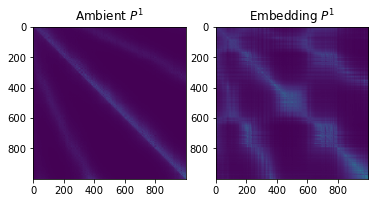

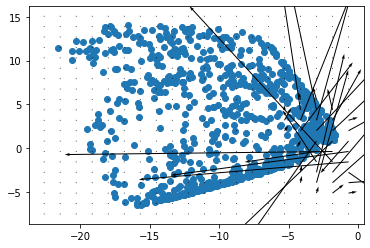

100%|██████████| 2000/2000 [08:18<00:00,  4.01it/s]

Exiting training with loss  tensor(0.4159, device='cuda:0', grad_fn=<AddBackward0>)


In [10]:
dfe2 = DiffusionFlowEmbedder(X,flow,t=1,
                             sigma_graph=5,sigma_embedding=5,device=device, 
                             learning_rate = 1e-3, smoothness = 0, weight_of_flow = 1)
dfe2 = dfe2.to(device)
embeddings = dfe2.fit(n_steps=2000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


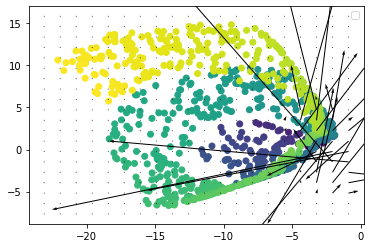

In [11]:
dfe2.visualize_points(labels)

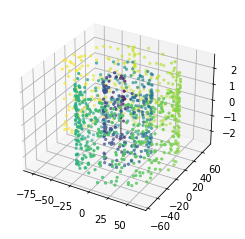

In [17]:
X, flow, labels = directed_swiss_roll_uniform(num_nodes=1000, num_spirals=2.5, radius=5, height=5, xtilt=0, ytilt=0)
plot_directed_3d(X, flow, labels, mask_prob=0.5)

X = torch.tensor(X)
flow = torch.tensor(flow)
X = X.float().to(device)
flow = flow.float().to(device)

  0%|          | 0/2000 [00:00<?, ?it/s]

EPOCH 0. Loss 1.7039836645126343. Flow strength 4.999000072479248. Weight of flow 1 Heatmap of P embedding is 


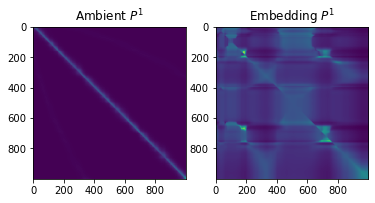

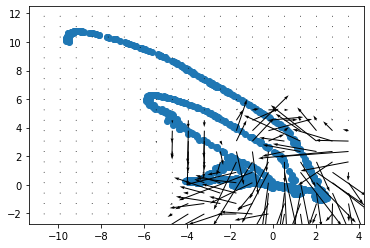

  5%|▌         | 100/2000 [00:23<07:06,  4.46it/s]

EPOCH 100. Loss 1.1169966459274292. Flow strength 5.062305450439453. Weight of flow 1 Heatmap of P embedding is 


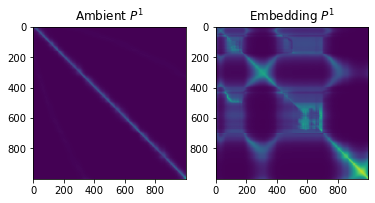

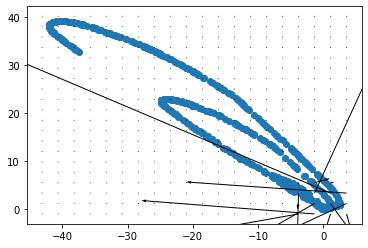

 10%|█         | 200/2000 [00:48<06:43,  4.47it/s]

EPOCH 200. Loss 0.7491041421890259. Flow strength 5.149476051330566. Weight of flow 1 Heatmap of P embedding is 


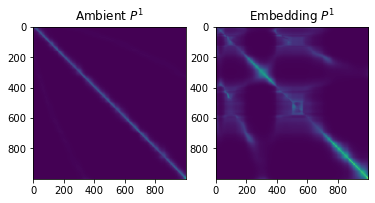

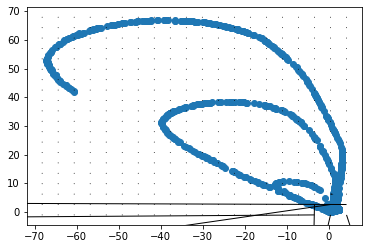

 15%|█▌        | 300/2000 [01:15<08:21,  3.39it/s]

EPOCH 300. Loss 0.5054308176040649. Flow strength 5.180909633636475. Weight of flow 1 Heatmap of P embedding is 


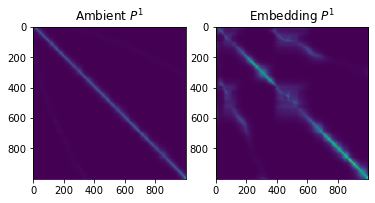

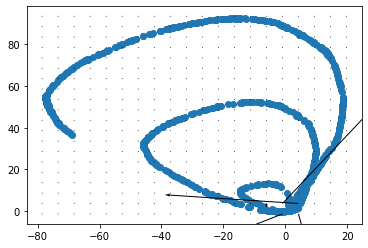

 20%|██        | 400/2000 [01:39<06:01,  4.43it/s]

EPOCH 400. Loss 0.2589603066444397. Flow strength 5.179901123046875. Weight of flow 1 Heatmap of P embedding is 


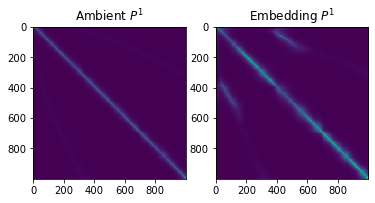

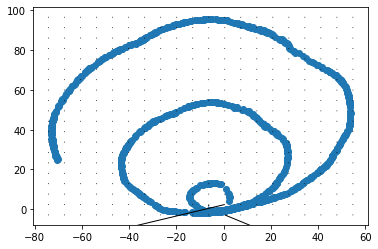

 25%|██▌       | 500/2000 [02:03<05:35,  4.48it/s]

EPOCH 500. Loss 0.18674583733081818. Flow strength 5.1641011238098145. Weight of flow 1 Heatmap of P embedding is 


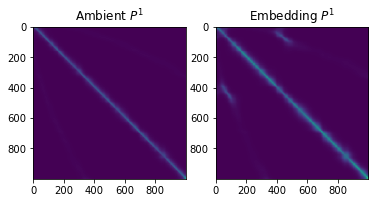

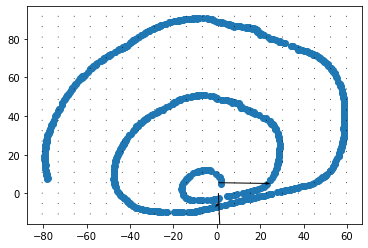

 30%|███       | 600/2000 [02:26<05:13,  4.46it/s]

EPOCH 600. Loss 0.12053244560956955. Flow strength 5.161307334899902. Weight of flow 1 Heatmap of P embedding is 


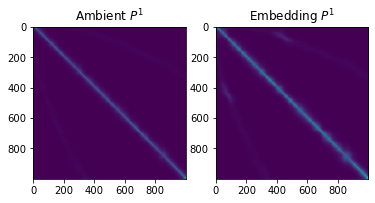

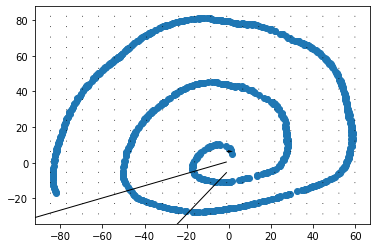

 35%|███▌      | 700/2000 [02:50<04:50,  4.48it/s]

EPOCH 700. Loss 0.0954655334353447. Flow strength 5.16131591796875. Weight of flow 1 Heatmap of P embedding is 


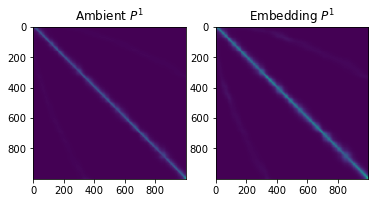

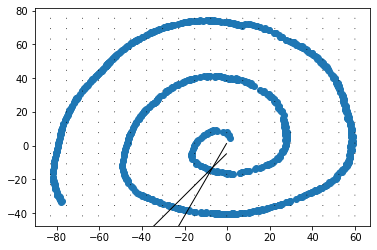

 40%|████      | 800/2000 [03:13<04:28,  4.48it/s]

EPOCH 800. Loss 0.0893363207578659. Flow strength 5.161392688751221. Weight of flow 1 Heatmap of P embedding is 


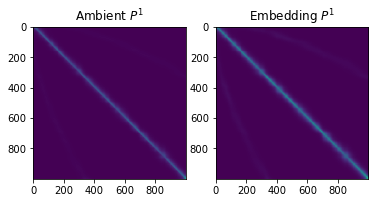

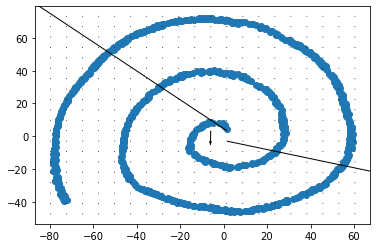

 45%|████▌     | 900/2000 [03:37<04:06,  4.47it/s]

EPOCH 900. Loss 0.08691702783107758. Flow strength 5.161564826965332. Weight of flow 1 Heatmap of P embedding is 


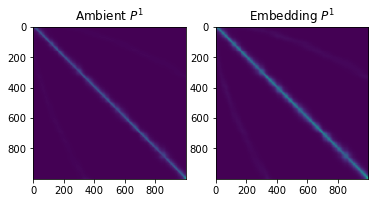

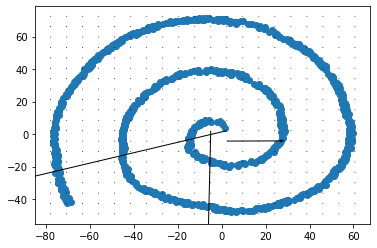

 50%|█████     | 1000/2000 [04:01<03:43,  4.48it/s]

EPOCH 1000. Loss 0.08531311899423599. Flow strength 5.161726474761963. Weight of flow 1 Heatmap of P embedding is 


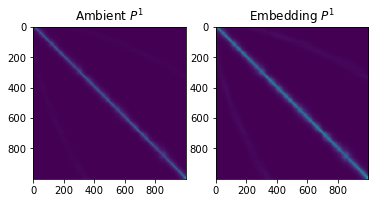

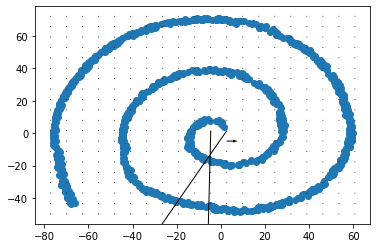

 55%|█████▌    | 1100/2000 [04:24<03:21,  4.47it/s]

EPOCH 1100. Loss 0.0847654938697815. Flow strength 5.161852836608887. Weight of flow 1 Heatmap of P embedding is 


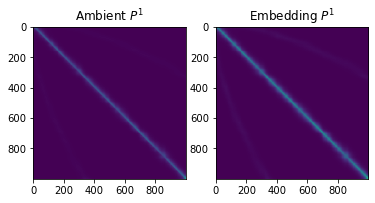

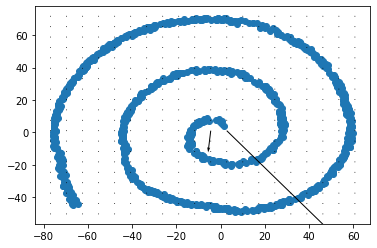

 60%|██████    | 1200/2000 [04:54<03:56,  3.39it/s]

EPOCH 1200. Loss 0.0844942256808281. Flow strength 5.161948204040527. Weight of flow 1 Heatmap of P embedding is 


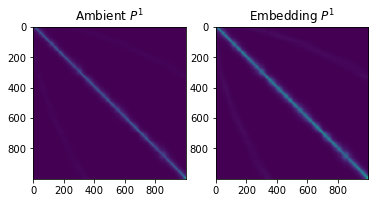

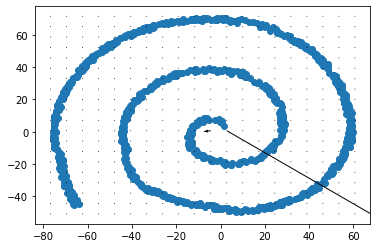

 65%|██████▌   | 1300/2000 [05:25<03:26,  3.39it/s]

EPOCH 1300. Loss 0.08430938422679901. Flow strength 5.162043571472168. Weight of flow 1 Heatmap of P embedding is 


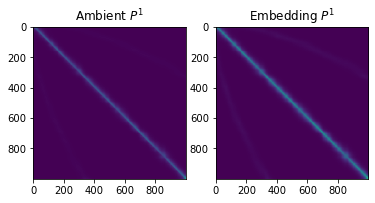

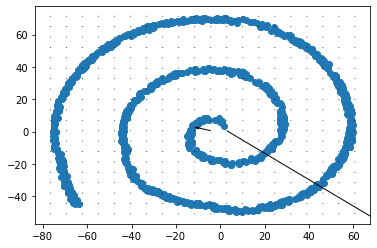

 70%|███████   | 1400/2000 [05:56<02:56,  3.39it/s]

EPOCH 1400. Loss 0.08415163308382034. Flow strength 5.162138938903809. Weight of flow 1 Heatmap of P embedding is 


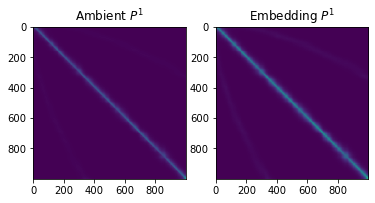

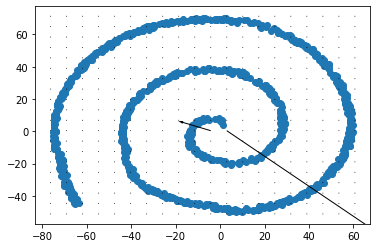

 75%|███████▌  | 1500/2000 [06:26<02:27,  3.39it/s]

EPOCH 1500. Loss 0.08401276916265488. Flow strength 5.1621904373168945. Weight of flow 1 Heatmap of P embedding is 


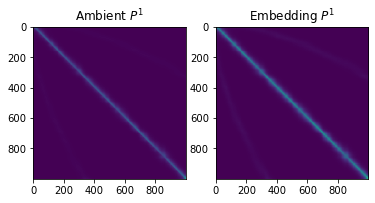

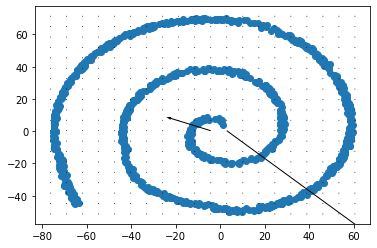

 80%|████████  | 1600/2000 [06:56<01:29,  4.47it/s]

EPOCH 1600. Loss 0.0839201956987381. Flow strength 5.162238121032715. Weight of flow 1 Heatmap of P embedding is 


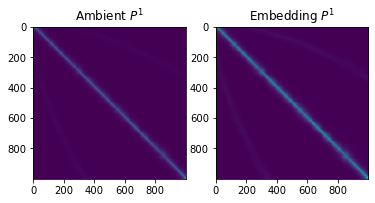

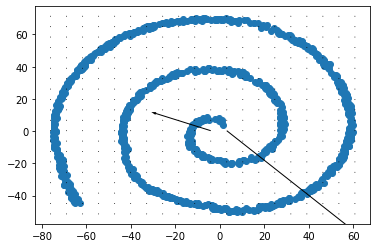

 85%|████████▌ | 1700/2000 [07:20<01:06,  4.50it/s]

EPOCH 1700. Loss 0.08383737504482269. Flow strength 5.162285804748535. Weight of flow 1 Heatmap of P embedding is 


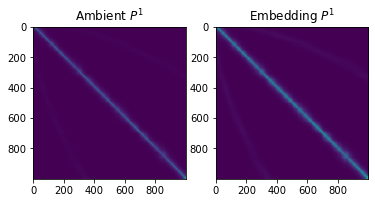

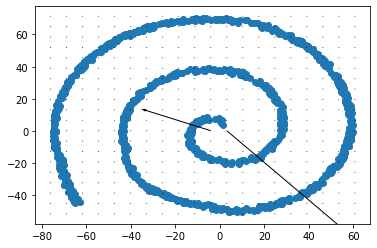

 90%|█████████ | 1800/2000 [07:44<00:48,  4.11it/s]

EPOCH 1800. Loss 0.08377061784267426. Flow strength 5.1623334884643555. Weight of flow 1 Heatmap of P embedding is 


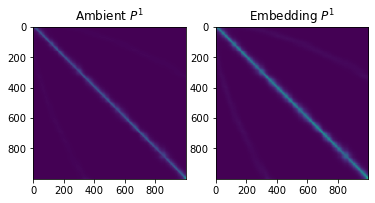

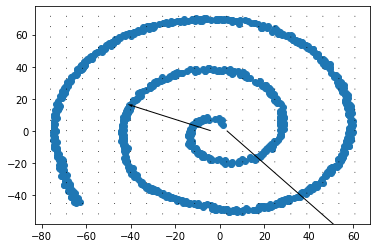

 95%|█████████▌| 1900/2000 [08:10<00:22,  4.49it/s]

EPOCH 1900. Loss 0.08369430154561996. Flow strength 5.162381172180176. Weight of flow 1 Heatmap of P embedding is 


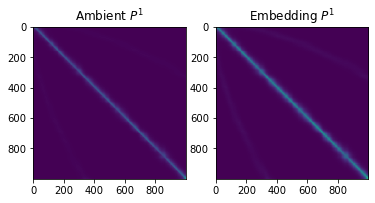

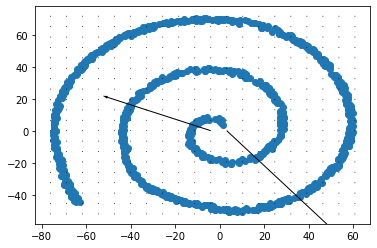

100%|██████████| 2000/2000 [08:34<00:00,  3.89it/s]

Exiting training with loss  tensor(0.0836, device='cuda:0', grad_fn=<AddBackward0>)


In [19]:
dfe3 = DiffusionFlowEmbedder(X,flow,t=1,
                             sigma_graph=10,sigma_embedding=10,device=device, 
                             learning_rate = 1e-3, smoothness = 0, weight_of_flow = 1)
dfe3 = dfe3.to(device)
embeddings = dfe3.fit(n_steps=2000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


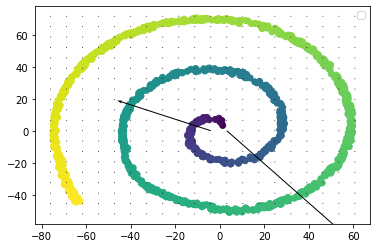

In [20]:
dfe3.visualize_points(labels)